In [71]:
import pandas as pd
import numpy as np
np.random.seed(0)
import random

import tensorflow as tf
from tensorflow import keras
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# Reading the data
train = pd.read_csv('./digit-recognizer/train.csv')
test = pd.read_csv('./digit-recognizer/test.csv')

X_train = train.drop(labels=[ "label" ], axis=1)
y_train = train['label']

X_test = test

print(X_train.shape, X_test.shape)

(42000, 784) (28000, 784)


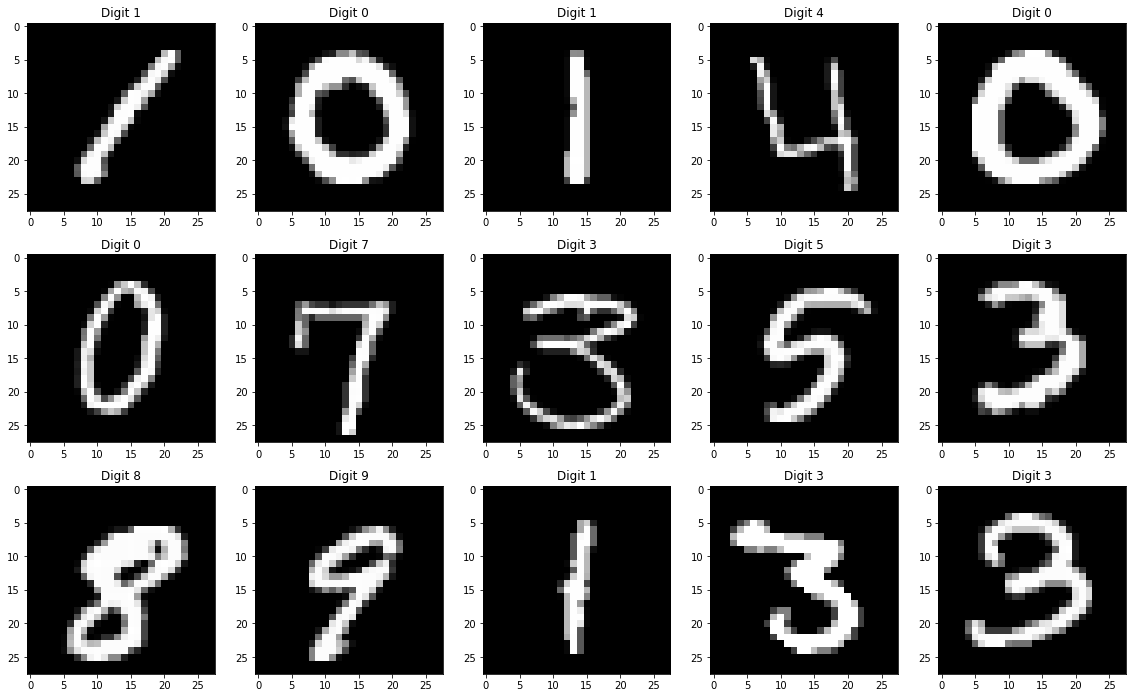

In [58]:
X_train_plot = X_train.values.reshape(-1, 28, 28)

def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize=(16,16))
    for i in range(15):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X_train_plot[i], cmap=mono)
        plt.title("Digit {}".format(y_train[i]))

    plt.tight_layout()

Show_example_digits()

In [59]:
# Function return digit in grayscale
def plot_digit(digit, dem= 28, font_size = 12):
    max_ax = font_size*dem

    fig = plt.figure(figsize=(13, 13))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black='#000000'

    for i in range(dem):
        for j in range(dem):
            t = plt.text(i * font_size, max_ax - j*font_size, digit[i][j], fontsize=font_size, color=black)
            c = digit[i][j] / 255.
            t.set_bbox(dict(facecolor=(c, c, c), alpha= 0.5, edgecolor= 'black'))

    plt.show()

7


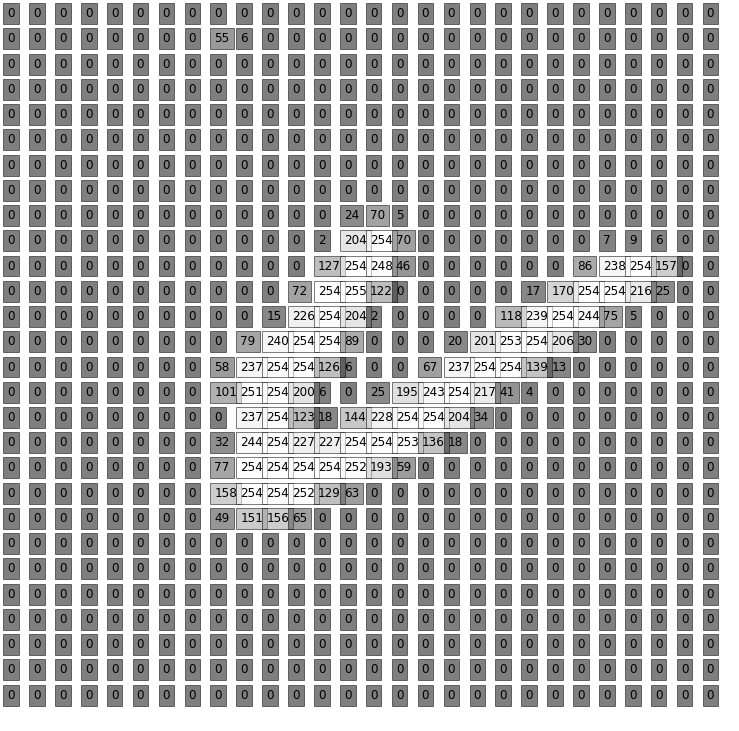

In [61]:
rand_number = random.randint(0, len(y_train))
print(y_train[rand_number])
plot_digit(X_train_plot[rand_number])

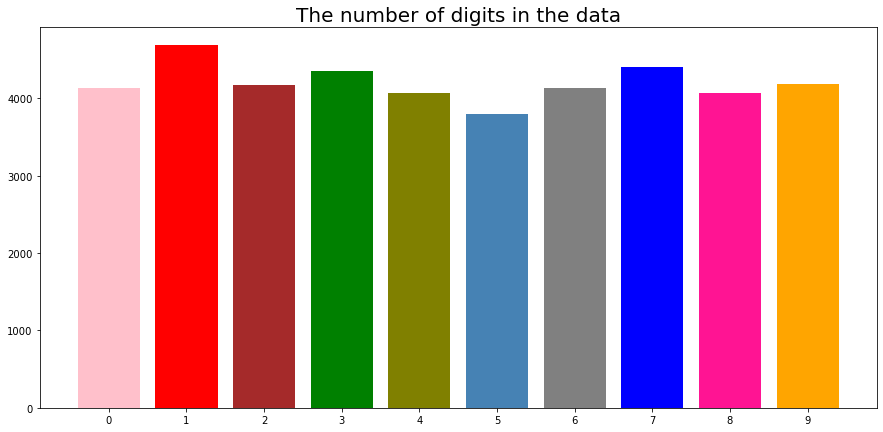

In [62]:
# chart of the number of digits in the data
digit_range = np.arange(10)

val = y_train.value_counts().index
cnt = y_train.value_counts().values
mycolors = ['red', 'blue', 'green', 'orange', 'brown', 'grey', 'pink', 'olive', 'deeppink', 'steelblue']

plt.figure(figsize = (15, 7))
plt.title("The number of digits in the data", fontsize = 20)
plt.xticks(range(10))
plt.bar(val, cnt, color = mycolors);

In [63]:
num_pixels = X_train.shape[1]

# Data normalization [0, 1]
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train)

num_classes = y_train.shape[1]

print(X_train.shape, X_test.shape)

(42000, 784) (28000, 784)


In [64]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)

In [66]:
def cnn():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
        
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
        
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [67]:
model = cnn()
opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.9, momentum=0.9,decay=1e-6, nesterov=False)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=opt_sgd, 
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)         

In [68]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='loss', patience=5)
model_checkpoint = ModelCheckpoint("model.h5", save_best_only=True)
callbacks = [reduce_lr, early_stopping, model_checkpoint]

In [69]:
learning_history = model.fit(X_train, y_train,
          batch_size = 128,
          epochs = 10,
          verbose = 1,
          callbacks = callbacks)

Epoch 1/10
329/329 [==============================] - 37s 112ms/step - loss: 2.3194 - accuracy: 0.0995
Epoch 2/10
329/329 [==============================] - 37s 113ms/step - loss: 2.3169 - accuracy: 0.0998
Epoch 3/10
329/329 [==============================] - 39s 117ms/step - loss: 2.3173 - accuracy: 0.1006
Epoch 4/10
329/329 [==============================] - 38s 117ms/step - loss: 2.3174 - accuracy: 0.1020
Epoch 5/10
329/329 [==============================] - 39s 117ms/step - loss: 2.3184 - accuracy: 0.1022
Epoch 6/10
329/329 [==============================] - 39s 117ms/step - loss: 2.3187 - accuracy: 0.1028
Epoch 7/10
329/329 [==============================] - 38s 116ms/step - loss: 2.3173 - accuracy: 0.1050


In [78]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	plt.close()

KeyError: 'val_loss'

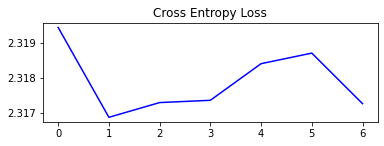

In [79]:
summarize_diagnostics(learning_history)